In [2]:
import audioSegmentation
import audioBasicIO
import pydub
import librosa
import IPython.display as ipd
import soundfile
import pandas as pdgroundtruthgroundtruth
from pydub import AudioSegment
from pydub.playback import play
import librosa.display
from librosa import load
import matplotlib.pyplot as plt 
import numpy as np
import os
import tarfile
import sox
from  pysndfx import AudioEffectsChain
from pyAudioAnalysis import audioSegmentation as aS
from pydub import AudioSegment
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import scipy.ndimage
import time
import warnings
import itertools
warnings.filterwarnings('ignore')
import  create_data_set

In [3]:
import itertools

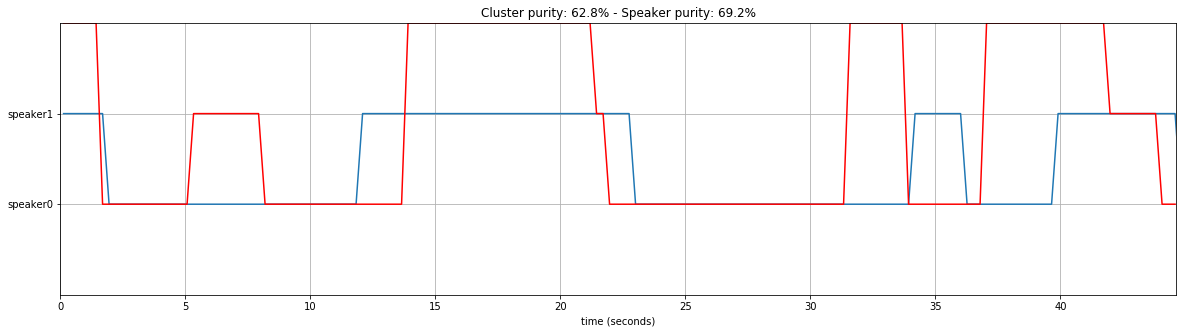

(62.7906976744186, 69.18604651162791)

In [21]:
cls,clus_pure,speak_pure=audioSegmentation.speaker_diarization('path/to/wav_file.wav',2,mid_window=0.5, mid_step=0.26,short_window=0.12,lda_dim=35,plot_res=True)        
clus_pure,speak_pure

In [9]:
# Grid-search for optimal parameters pyAudioAnalysis speaker_diarization.
mid_windows=[0.4,0.6,0.8]
mid_steps=[0.2,0.3,0.4]
short_windows=[0.05,0.1,0.2]

files_params_dict={}
files_performance_dict={}
for i,name in enumerate(os.listdir('some_directory')):     
    seq = ('mid_window', 'mid_step','short_window')
    param_dict= dict.fromkeys(seq)
    seq = ('cluster_putiry', 'speaker_purity')
    perf_dict= dict.fromkeys(seq) 
    best_per=100
    if name.split('.')[1]=='wav':         
        clus_pure,speak_pure=0,0
        for m_window in mid_windows:
            for m_step in mid_steps:              
                for sh_window in short_windows:
                    if m_step>m_window:
                        continue 
                    else:    
                        try:
                            _,clus_pure,speak_pure=audioSegmentation.speaker_diarization(name,2,mid_window=m_window, mid_step=m_step,short_window=sh_window,lda_dim=35,plot_res=False)
                        except:
                            pass
                        if (clus_pure+speak_pure)>best_per:
                            best_per=clus_pure+speak_pure
                            param_dict['mid_window'    ]=m_window
                            param_dict['mid_step'      ]=m_step
                            param_dict['short_window'  ]=sh_window
                            perf_dict ['cluster_putiry']=clus_pure
                            perf_dict ['speaker_purity']=speak_pure
        print("performance",perf_dict ['cluster_putiry'],perf_dict ['speaker_purity'])
        files_params_dict[name]= param_dict
        files_performance_dict[name]= perf_dict

iter 72.wav
performance 73.91304347826086 84.472049689441
iter 73.wav
performance 81.9047619047619 88.57142857142857
iter 74.wav
performance 78.65168539325843 52.80898876404494
iter 75.wav
performance 68.88888888888889 75.0
iter 76.wav
performance 87.05882352941177 90.58823529411765
iter 77.wav
performance 65.78947368421053 84.86842105263158
iter 78.wav
performance 55.96330275229357 83.4862385321101
iter 79.wav
performance 88.46153846153845 92.3076923076923
iter 8.wav
performance 65.4054054054054 70.27027027027027
iter 80.wav
performance 95.65217391304348 100.0
iter 81.wav
performance 77.77777777777779 87.65432098765432
iter 82.wav
performance 79.64071856287424 87.42514970059881
iter 83.wav
performance 51.533742331288344 70.5521472392638
iter 84.wav
performance 76.0 76.0
iter 85.wav
performance 80.92105263157895 80.92105263157895
iter 86.wav
performance 67.6829268292683 70.1219512195122
iter 87.wav
performance 80.91603053435115 90.07633587786259
iter 88.wav
performance 58.3333333333333

In [11]:
perf_dict ['cluster_putiry']

76.8361581920904

In [12]:
parameter_df=pd.DataFrame.from_dict(files_params_dict).T
performance_df=pd.DataFrame.from_dict(files_performance_dict).T
final_output=parameter_df.join(performance_df)
final_output["tot_performance"]=list(map(lambda x,y:x+y,final_output["cluster_putiry"].values,final_output["speaker_purity"].values))
final_output=final_output.sort_values(["tot_performance"],ascending=False)

In [15]:
print(np.average(final_output["cluster_putiry"]))
print(np.average(final_output["speaker_purity"]))

73.52950484314475
80.08779871815598


In [7]:
best_perform=final_output[final_output["tot_performance"]>175]
print(np.average(final_output["mid_window"]))
print(np.average(final_output["mid_step"]))
print(np.average(final_output["short_window"]))

0.4999999999999999
0.26142857142857134
0.11785714285714283


In [ ]:
# performance of wav file with silence segments, and with silence segments removed.
# at the same folder with the wav file , the .segments file with t_start t_end sound_type should be placed.

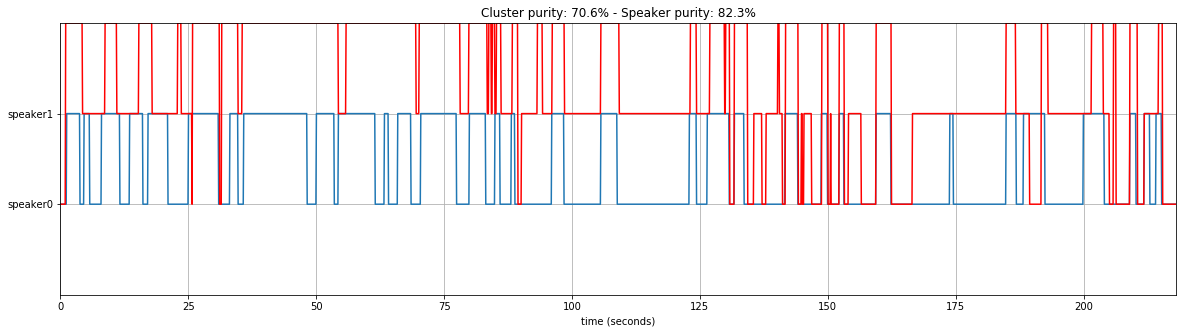

In [2]:
file_name = '950296.wav'
a,_,_=audioSegmentation.speaker_diarization(file_name,2,mid_window=0.2, mid_step=0.1,short_window=0.02,lda_dim=35,plot_res=True)

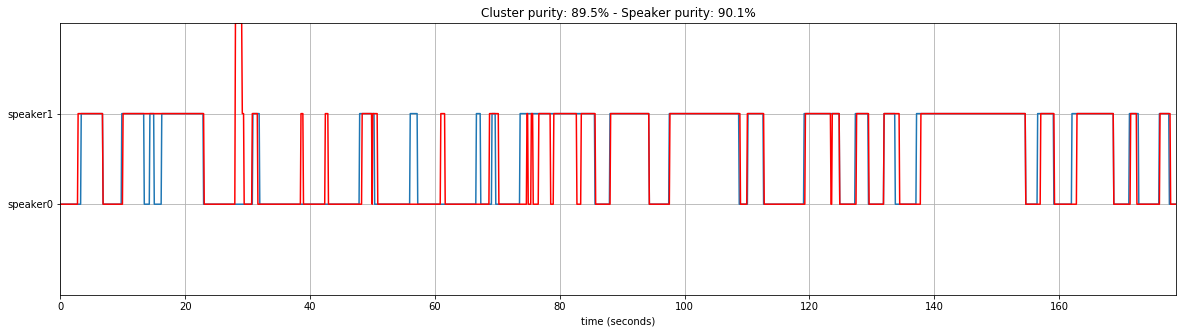

In [2]:
file_name='950296.wav'
file_name = "no_silence_"+file_name
a,clus_pure,speak_pure,result=audioSegmentation.speaker_diarization(file_name,2,mid_window=0.2, mid_step=0.1,short_window=0.02,lda_dim=35,plot_res=True)

In [14]:
file_name = '951702.wav'
a=audioSegmentation.speaker_diarization(file_name,2,mid_window=0.08, mid_step=0.04,short_window=0.01,lda_dim=35,plot_res=True)

C:\Users\PolinaSvidovsky\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 4 - 1) = 3 components.
  ChangedBehaviorWarning)
C:\Users\PolinaSvidovsky\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


951702.segments
path C:\Users\PolinaSvidovsky\pyAudioAnalysis-master\pyAudioAnalysis
recieved_file
70.4	77.0
